## Modules

In [1]:
## Import libraries for data exploration and visualization 

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

## Import libraries for modelling 

from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions


## Load Dataset

In [2]:
## Read the csv file for Dataset

df=pd.read_csv("customer_segmentation.csv" ,encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print(f"Dataframe dimensions: {df.shape}")

Dataframe dimensions: (541909, 8)


#### Attribute Information:

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.

## Data analysis

#### Wrangling dataset

* Type of variables
* Missing values
* Convert types of columns
* Duplicated values
* Check unique CustomerID of customer
* Statistical overviow
* Outliers

In [4]:
## Type of variables

df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Missing

In [5]:
## Missing values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
## Drop null values for the customer column 

df.dropna(subset=['CustomerID'], inplace= True)

In [7]:
## Converting InvoiceDate columns to datetime type

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

## Converting CustomerID columns to int type

df = df.astype({'CustomerID':'int'})

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [9]:
## These are the transactions that have been canceled also Unitprice with zeros values 

mask1=df[(df['InvoiceNo'].str[:1]=='C') | (df['UnitPrice']==0)]
mask1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [10]:
## Drop canceled transactions and transactions with zero values

df=df.drop(mask1.index)

In [11]:
# Check the shape of datset

df.shape

(397884, 8)

Duplicated

In [12]:
## Check for duplicated values

df.duplicated().sum()

5192

In [13]:
## Drop duplicated values

df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [14]:
## Check unique CustomerID of customer

df.CustomerID.nunique()

4338

In [15]:
## Statistical overviow 'Numerical columns'

df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Outliers

In [16]:
def boundries(df, col):
    IQR= df[col].quantile(0.75)-df[col].quantile(0.25)
    lower_bound=df[col].quantile(0.25)-(IQR*3)
    upper_bound=df[col].quantile(0.75)+(IQR*3)
    return lower_bound, upper_bound

In [17]:
## drop outliers of Quantity column

df.drop((df[df.Quantity<boundries(df,'Quantity')[0]].index ), inplace=True)
df.drop((df[df.Quantity>boundries(df,'Quantity')[1]].index ), inplace=True)

## drop outliers of UnitPrice column

df.drop((df[df.UnitPrice<boundries(df,'UnitPrice')[0]].index ), inplace=True)
df.drop((df[df.UnitPrice>boundries(df,'UnitPrice')[1]].index ), inplace=True)

In [18]:
df.shape

(369762, 8)

In [19]:
## feature engeenering 

df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [20]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### RFM Table 
RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

In [21]:
import datetime as dt

today_date=dt.datetime(2011, 12, 11)
rfm=df.groupby('CustomerID').agg({'InvoiceDate':[lambda date: (date.max()-date.min()).days, # days beween the first and last prueshases 
                                                 lambda date:(today_date-date.min()).days], # days between the last prushases and today day
                                  'InvoiceNo'  : lambda num:num.nunique(),                  # freq of the prushases each time 
                                  'TotalPrice' : lambda TotalPrice:TotalPrice.sum()})       # the revenue for all prushases
                                    
rfm.columns=rfm.columns.droplevel(0)
rfm.columns=['recency_cltv_p','T','frequncy', 'monetary'] ## Naming columns 

rfm

,recency_cltv_p,T,frequncy,monetary
CustomerID,,,,
12347,365,368,7,3783.23
12348,109,359,3,90.20
12349,0,19,1,1328.55
12350,0,311,1,294.40
12352,260,297,7,1321.99
...,...,...,...,...
18280,0,278,1,180.60
18281,0,181,1,46.92
18282,118,127,2,113.13


In [22]:
rfm['monetary']=rfm['monetary']/rfm['frequncy']                # devid the monetary by freq to see the avrage price amount for each prushases
rfm.rename(columns={'monetary':'monetary_avrg'}, inplace=True) # rename the averge amount for each prushasing 

## the scale time that i will use is weeks 

rfm["recency_weekly"]=rfm['recency_cltv_p']/7 # divid it by 7 days to find out the number of weeeks 
rfm["T_weekly"]=rfm['T']/7                    # divid it by 7 days to find out the number of weeeks
rfm=rfm[(rfm['frequncy']>1)]                  # dumbing prushases less than 2

rfm

,recency_cltv_p,T,frequncy,monetary_avrg,recency_weekly,T_weekly
CustomerID,,,,,,
12347,365,368,7,540.461429,52.142857,52.571429
12348,109,359,3,30.066667,15.571429,51.285714
12352,260,297,7,188.855714,37.142857,42.428571
12356,302,326,3,592.963333,43.142857,46.571429
12358,149,151,2,464.030000,21.285714,21.571429
...,...,...,...,...,...,...
18272,244,247,6,487.016667,34.857143,35.285714
18273,255,258,3,68.000000,36.428571,36.857143
18282,118,127,2,56.565000,16.857143,18.142857


In [23]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 12347 to 18287
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency_cltv_p  2747 non-null   int64  
 1   T               2747 non-null   int64  
 2   frequncy        2747 non-null   int64  
 3   monetary_avrg   2747 non-null   float64
 4   recency_weekly  2747 non-null   float64
 5   T_weekly        2747 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 150.2 KB


In [24]:
rfm.describe()

,recency_cltv_p,T,frequncy,monetary_avrg,recency_weekly,T_weekly
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,198.934110,258.361121,5.755005,299.953398,28.419159,36.908732
std,113.208911,102.661831,8.469906,216.907323,16.172702,14.665976
min,0.000000,10.000000,2.000000,3.450000,0.000000,1.428571
25%,99.000000,191.500000,2.000000,163.983667,14.142857,27.357143
50%,206.000000,283.000000,4.000000,252.090000,29.428571,40.428571
75%,299.000000,358.000000,6.000000,370.117788,42.714286,51.142857
max,373.000000,374.000000,201.000000,2696.735385,53.285714,53.428571


In [25]:
rfm.shape

(2747, 6)

### Modeling

first:

let’s use the BetaGeoFitter model data to predict the number of purchases each customer will make in some forthcoming periods.

In [26]:
bgf=BetaGeoFitter( penalizer_coef = 0.001)

bgf.fit(rfm['frequncy'],
        rfm['recency_weekly'],
        rfm['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 2747 subjects, a: 0.11, alpha: 12.76, b: 2.44, r: 2.33>

Predict the number of orders each customer will make during one week period 

In [27]:
bgf.predict(1,
            rfm['frequncy'],
            rfm['recency_weekly'],
            rfm['T_weekly'] ).sort_values(ascending=False).head()

CustomerID
12748    3.065160
14911    2.974696
17841    1.888030
15311    1.406748
14606    1.391199
dtype: float64

Predict the number of orders each customer will make during one month period  

In [28]:
rfm['expected_number_of_prushases']=bgf.predict(1*4,
                                                rfm['frequncy'],
                                                rfm['recency_weekly'],
                                                rfm['T_weekly'] )

In [29]:
rfm.sort_values('expected_number_of_prushases',ascending=False).head()

,recency_cltv_p,T,frequncy,monetary_avrg,recency_weekly,T_weekly,expected_number_of_prushases
CustomerID,,,,,,,
12748,372,374,201,124.595970,53.142857,53.428571,12.230303
14911,372,374,195,538.549744,53.142857,53.428571,11.869340
17841,371,374,123,301.624065,53.000000,53.428571,7.533391
15311,373,374,91,264.779341,53.285714,53.428571,5.613010
14606,372,374,90,114.460778,53.142857,53.428571,5.550968


Compare the model’s predictions to the actual data

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

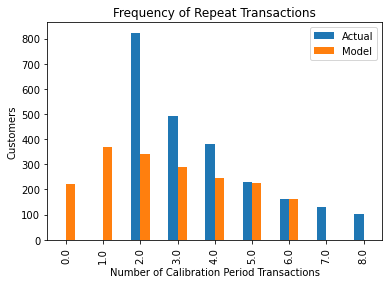

In [30]:
plot_period_transactions(bgf)

As you can see, there is differant between them, which shows that the model is perfact

Second:

let’s use the GammaGammaFitter model data to predicted average order value for each customer will make in some forthcoming periods.

In [31]:
ggf=GammaGammaFitter(penalizer_coef=0.01)

ggf.fit( rfm['frequncy'],
         rfm['monetary_avrg'])

<lifetimes.GammaGammaFitter: fitted with 2747 subjects, p: 3.85, q: 0.36, v: 3.78>

In [32]:
rfm['expected_average_profit']=ggf.conditional_expected_average_profit( rfm['frequncy'],
                                                                        rfm['monetary_avrg'])
rfm

,recency_cltv_p,T,frequncy,monetary_avrg,recency_weekly,T_weekly,expected_number_of_prushases,expected_average_profit
CustomerID,,,,,,,,
12347,365,368,7,540.461429,52.142857,52.571429,0.561471,554.072114
12348,109,359,3,30.066667,15.571429,51.285714,0.112578,33.151913
12352,260,297,7,188.855714,37.142857,42.428571,0.651509,193.971679
12356,302,326,3,592.963333,43.142857,46.571429,0.346112,628.836878
12358,149,151,2,464.030000,21.285714,21.571429,0.484891,507.851191
...,...,...,...,...,...,...,...,...
18272,244,247,6,487.016667,34.857143,35.285714,0.679363,501.447491
18273,255,258,3,68.000000,36.428571,36.857143,0.416845,73.294834
18282,118,127,2,56.565000,16.857143,18.142857,0.535487,63.716413


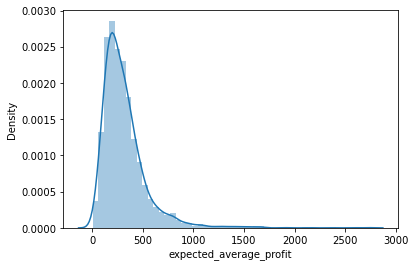

In [33]:
ax = sns.distplot(rfm['expected_average_profit'])


Most of our customers are going to spend a Good amount, but there’s a long-tail of higher value customers and a little group of really big spenders on the far right

 Predicting Customer Lifetime Value

In [34]:
cltv_1=ggf.customer_lifetime_value(  bgf,
                                     rfm['frequncy'],
                                     rfm['recency_weekly'],
                                     rfm['T_weekly'],
                                     rfm['monetary_avrg'],
                                     time=1,   # The time parameter is in months and defines how many months into the future we wish to predict
                                     freq='W', # Based on scale of our time  
                                     discount_rate=0.01)

In [35]:
cltv_1=cltv_1.reset_index()
cltv_1.rename(columns={'clv':'clv_1'}, inplace=True)

Best customers to be over the next month

In [36]:
cltv_1.sort_values('clv_1',ascending=False).head()

,CustomerID,clv_1
804,14096,7679.395720
1209,14911,6878.958431
351,13089,3067.588627
802,14088,3010.915139
2561,17841,2446.643464
